In [ ]:
 import os
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split
import matplotlib as mpl
mpl.style.use('classic')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools
#Import keras functions
from keras.datasets import cifar10
import keras
from keras import backend as k
#k.set_image_dim_ordering('tf')
from keras.models import Sequential
from keras.applications import VGG19,ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import Callback
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical, np_utils
from google.colab import files

chargement des données.

Configuration de l'environnement et importation des bibliothèques necessaires

In [ ]:
# load train and test dataset

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

	

Préparation des données

In [ ]:
mean = np.mean(x_train, axis=(0,1,2,3))
std = np.std(x_train, axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)


In [ ]:
nClasses = 10
y_train = to_categorical(y_train, nClasses)
y_test = to_categorical(y_test, nClasses)



In [ ]:
print(x_train.shape)
print(y_train.shape)
  

(50000, 32, 32, 3)
(50000, 10)


modèle

In [ ]:
input_shape = (32,32,3)

In [ ]:
def createModel():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
  model.add(Conv2D(32, (3 ,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2 ,2)))
  model.add(Dropout(0.4))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3 ,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2 ,2)))
  model.add(Dropout(0.4))  

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3 ,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2 ,2)))
  model.add(Dropout(0.4))  

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(nClasses, activation='softmax'))
  return model


In [ ]:
k.clear_session()
model = createModel()

In [ ]:
AdamOpt = Adam(lr=0.001)
model.compile(optimizer=AdamOpt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

fonction d'évaluation du modèle

In [ ]:
class CustomCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    
    if (epoch % 5 == 0):
      
      print("just finished epoch", epoch)
      print("-----------------------------------------------")
      print('Loss evaluated on the validation dataset =',logs.get('val_loss'))
      print("Accuracy reached is :", logs['accuracy'])
      print("Accuracy reached Val is", logs['val_accuracy'])
    
    



Entrainement du réseau

In [ ]:
batch_size = 256
epochs = 50

CC = CustomCallback()
history = model.fit(x_train, y_train, batch_size=batch_size, 
                    epochs=epochs, verbose=0, 
                    validation_data=(x_test, y_test), 
                    callbacks=[CC])

just finished epoch 0
-----------------------------------------------
Loss evaluated on the validation dataset = 1.4899245098114013
Accuracy reached is : 0.29244
Accuracy reached Val is 0.4433000087738037
just finished epoch 5
-----------------------------------------------
Loss evaluated on the validation dataset = 0.8792782276153565
Accuracy reached is : 0.64094
Accuracy reached Val is 0.6897000074386597
just finished epoch 10
-----------------------------------------------
Loss evaluated on the validation dataset = 0.7178575138092042
Accuracy reached is : 0.7201
Accuracy reached Val is 0.7527999877929688
just finished epoch 15
-----------------------------------------------
Loss evaluated on the validation dataset = 0.6419231245040894
Accuracy reached is : 0.74896
Accuracy reached Val is 0.7797999978065491
just finished epoch 20
-----------------------------------------------
Loss evaluated on the validation dataset = 0.5972278104782105
Accuracy reached is : 0.76912
Accuracy reached

voyons les courbes de precision et de perte

Text(0.5, 1.0, 'Courbes de précision du modèle')

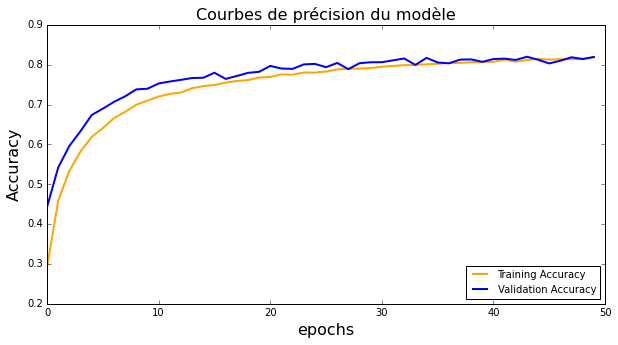

In [ ]:
#plots
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'],'orange',linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=10, loc='lower right')
plt.xlabel('epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Courbes de précision du modèle', fontsize=16)